<a href="https://colab.research.google.com/github/clairekim07/logisticRegression_colab/blob/main/logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Input X Test here: 5


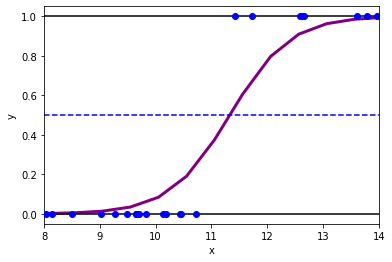

In [55]:
#@title
import csv
import pandas as panda
import plotly.express as px
import numpy as np
df = panda.read_csv("escape.csv")
fig = px.scatter(df, x="Velocity", y="Escaped")


#universal variables
escaped = df["Escaped"].tolist()
velocity = df["Velocity"].tolist()
escapedArray = np.array(escaped)
velocityArray = np.array(velocity)

#hit and trial method
m = .85
b = 10.6
y = []
for x in velocityArray:
  yValue = m * x + b
  y.append(yValue)

sc = px.scatter(x = velocity, y = escaped)
sc.update_layout(shapes=[dict(type = 'line', y0 = min(velocity),y1 = max(velocity), x0 = min(y), x1 = max(y))])
sc.show()
#hit and trial method with numpy
m, b = np.polyfit(velocityArray, escapedArray,1)

y = []

for x in velocityArray:
  yValue = m * x + b
  y.append(yValue)
#showing the graph
fig.update_layout(shapes=[dict(type = 'line',y0 = min(y), y1 = max(y), x0 = min(velocityArray), x1 = max(velocityArray))])
fig.show()
#sigmoid function method
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression

x = np.reshape(velocity, (len(velocity),1))
y = np.reshape(escaped, (len(escaped),1))

logr = LogisticRegression()

logr.fit(x,y)

plot.figure()

plot.scatter(x.ravel(), y, color='blue', zorder = 3)

def model(x):
  return 1/(1+np.exp(-x))

xTest = np.linspace(0, 100, 200)
chances = model(xTest * logr.coef_ + logr.intercept_).ravel()

plot.plot(xTest, chances, color='purple', linewidth = 3)
plot.axhline(y = 0, color = 'k', linestyle = '-')
plot.axhline(y = 1, color = 'k', linestyle = '-')
plot.axhline(y = .5, color = 'b', linestyle = '--')

plot.axvline(x = xTest[5], color = 'b', linestyle = '--')

plot.ylabel('y')
plot.xlabel('x')
plot.xlim(8,14)
plot.show()

#conclusion

'''
Using the sigmoid function method is best because you can see
the best fit for the velocity for escaoed. It also cleans up
the graph by not including the outliers. It also reshapes the
graph so it is better to see the results and the comparison of
velocity and how many escaped. The sigmoid function is more 
accurate than the hit and trial method because it uses an 
algorithm that matches the numbers for this type of data.
'''